<a href="https://colab.research.google.com/github/HungPham2002/E-Commerce---Customer-Churn-Prediction/blob/main/DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from keras.models import Sequential 
from keras.layers import InputLayer 
from keras.layers import Dense 
from keras.layers import Dropout 
from keras.constraints import maxnorm
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf
import seaborn as sb

# Data

In [49]:
df = pd.read_csv('/content/drive/MyDrive/E-Commerce/dataset/mycsvfile.csv')

In [50]:
X = df.drop(columns = "customerstatus")
y = df["customerstatus"].values
X_train, X_test, y_train, y_test_ann = train_test_split(X, y, test_size = 0.3, random_state = 4, stratify =y)
col=['totalcharges','avgmonthlylongdistancecharges','monthlycharge','totalrevenue','totallongdistancecharges',
     'tenureinmonths','totallongdistancecharges','totalextradatacharges']
scaler = StandardScaler()
X_train[col] = StandardScaler().fit_transform(X_train[col])
X_test[col] = StandardScaler().fit_transform(X_test[col])
print(X_train.shape)
print(X_test.shape)

(4612, 29)
(1977, 29)


# ARTIFICIAL NEURAL NETWORK (ANN)

## Building model without optimization

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(29, input_shape=(29,), activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(15,activation = 'relu'),
    keras.layers.Dense(1, activation='sigmoid')
]
)
# time for compilation of neural net.
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
# now we fit our model to training data
history = model.fit(X_train,y_train, validation_data=(X_test, y_test),epochs=100)

Epoch 1/100
145/145 [==============================] - 2s 4ms/step - loss: 1.0706 - accuracy: 0.6405 - val_loss: 0.4606 - val_accuracy: 0.7759
Epoch 2/100
145/145 [==============================] - 0s 3ms/step - loss: 0.4309 - accuracy: 0.7958 - val_loss: 0.4248 - val_accuracy: 0.7982
Epoch 3/100
145/145 [==============================] - 0s 3ms/step - loss: 0.4021 - accuracy: 0.8066 - val_loss: 0.3950 - val_accuracy: 0.8194
Epoch 4/100
145/145 [==============================] - 0s 3ms/step - loss: 0.3906 - accuracy: 0.8200 - val_loss: 0.3816 - val_accuracy: 0.8295
Epoch 5/100
145/145 [==============================] - 0s 3ms/step - loss: 0.3713 - accuracy: 0.8233 - val_loss: 0.3779 - val_accuracy: 0.8230
Epoch 6/100
145/145 [==============================] - 1s 5ms/step - loss: 0.3623 - accuracy: 0.8313 - val_loss: 0.3685 - val_accuracy: 0.8316
Epoch 7/100
145/145 [==============================] - 1s 5ms/step - loss: 0.3589 - accuracy: 0.8356 - val_loss: 0.3812 - val_accuracy: 0.8184

In [ ]:
model.evaluate(X_test,y_test)

62/62 [==============================] - 0s 1ms/step - loss: 0.3377 - accuracy: 0.8563


[0.33774179220199585, 0.8563479781150818]

In [ ]:
y_pred = model.predict(X_test)

62/62 [==============================] - 0s 4ms/step


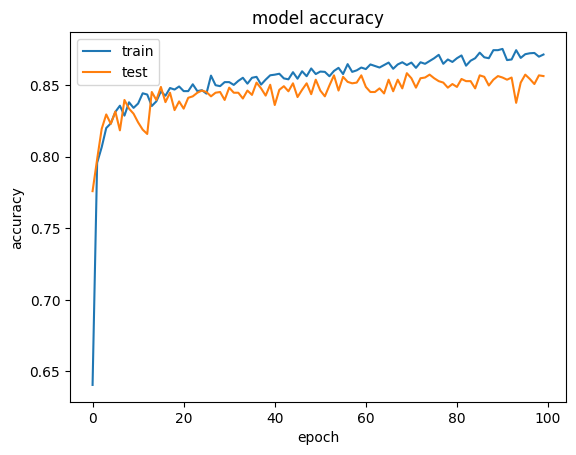

In [ ]:
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy']) 
plt.title('model accuracy') 
plt.ylabel('accuracy')
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left') 
plt.show()

## Tunning Parameters gen 1

In [ ]:
def create_model_gen1(neurons_layer1, neurons_layer2, neurons_layer3):
    model = keras.Sequential([
        keras.layers.Dense(neurons_layer1, input_shape=(29,), activation='relu'),
        keras.layers.Dense(neurons_layer2, activation='relu'),
        keras.layers.Dense(neurons_layer3, activation = 'relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model = KerasClassifier(build_fn=create_model_gen1, verbose = 1)
param_grid = {'neurons_layer1': [15, 20, 29], 'neurons_layer2': [10, 15, 20], 'neurons_layer3': [5, 10, 15]}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

<ipython-input-5-03a8d7529add>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model_gen1, verbose = 1)


145/145 [==============================] - 1s 2ms/step - loss: 0.5355 - accuracy: 0.7285
Best: 0.778405 using {'neurons_layer1': 29, 'neurons_layer2': 20, 'neurons_layer3': 10}


## Building model gen 1

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(29, input_shape=(29,), activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(10,activation = 'relu'),
    keras.layers.Dense(1, activation='sigmoid')
]
)

In [ ]:
# time for compilation of neural net.
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
# now we fit our model to training data
history = model.fit(X_train,y_train, validation_data=(X_test, y_test),epochs=100)

Epoch 1/100
145/145 [==============================] - 2s 5ms/step - loss: 0.5702 - accuracy: 0.7439 - val_loss: 0.4200 - val_accuracy: 0.7936
Epoch 2/100
145/145 [==============================] - 1s 4ms/step - loss: 0.4106 - accuracy: 0.8098 - val_loss: 0.3915 - val_accuracy: 0.8204
Epoch 3/100
145/145 [==============================] - 1s 5ms/step - loss: 0.3886 - accuracy: 0.8205 - val_loss: 0.3747 - val_accuracy: 0.8275
Epoch 4/100
145/145 [==============================] - 1s 5ms/step - loss: 0.3730 - accuracy: 0.8242 - val_loss: 0.3691 - val_accuracy: 0.8265
Epoch 5/100
145/145 [==============================] - 1s 5ms/step - loss: 0.3700 - accuracy: 0.8278 - val_loss: 0.3635 - val_accuracy: 0.8331
Epoch 6/100
145/145 [==============================] - 1s 5ms/step - loss: 0.3659 - accuracy: 0.8237 - val_loss: 0.3641 - val_accuracy: 0.8306
Epoch 7/100
145/145 [==============================] - 1s 4ms/step - loss: 0.3656 - accuracy: 0.8276 - val_loss: 0.3650 - val_accuracy: 0.8290

In [64]:
model.evaluate(X_test,y_test)

62/62 [==============================] - 0s 2ms/step - loss: 0.3589 - accuracy: 0.8508


[0.358946830034256, 0.8507840037345886]

In [ ]:
y_pred = model.predict(X_test)

62/62 [==============================] - 0s 1ms/step


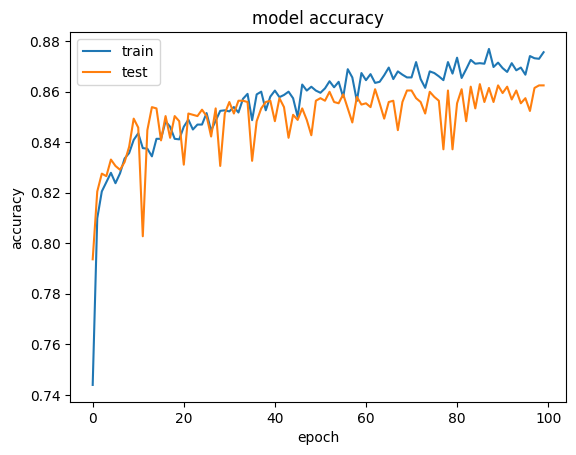

In [ ]:
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy']) 
plt.title('model accuracy') 
plt.ylabel('accuracy')
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left') 
plt.show()

## Tunning Parameters gen 2

In [ ]:
def create_model_gen2(learn_rate, batch_size):
    model = keras.Sequential([
        keras.layers.Dense(29, input_shape=(29,), activation='relu'),
        keras.layers.Dense(20, activation='relu'),
        keras.layers.Dense(10,activation = 'relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    
    optimizer = keras.optimizers.Adam(learning_rate=learn_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [ ]:
model = KerasClassifier(build_fn=create_model_gen2, verbose=0)

param_grid = {
    'learn_rate': [0.001, 0.01, 0.1],
    'batch_size': [8, 16, 32]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, verbose=1)
grid_result = grid.fit(X_train, y_train)

print(f'Best score: {grid_result.best_score_} using {grid_result.best_params_}')

Fitting 3 folds for each of 9 candidates, totalling 27 fits


<ipython-input-42-40db112fe391>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model_gen2, verbose=0)


Best score: 0.8085406025250753 using {'batch_size': 8, 'learn_rate': 0.01}


## Building final model 

In [39]:
model_ann = keras.Sequential([
    keras.layers.Dense(29, input_shape=(29,), activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(10,activation = 'relu'),
    keras.layers.Dense(1, activation='sigmoid')
]
)

In [40]:
optimizer = keras.optimizers.Adam(learning_rate=0.01)
model_ann.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model_ann.fit(X_train,y_train, validation_data=(X_test, y_test),epochs=100, batch_size=8)

Epoch 1/100
577/577 [==============================] - 2s 2ms/step - loss: 0.4359 - accuracy: 0.7899 - val_loss: 0.3777 - val_accuracy: 0.8245
Epoch 2/100
577/577 [==============================] - 1s 2ms/step - loss: 0.3840 - accuracy: 0.8190 - val_loss: 0.3606 - val_accuracy: 0.8336
Epoch 3/100
577/577 [==============================] - 1s 2ms/step - loss: 0.3747 - accuracy: 0.8252 - val_loss: 0.3591 - val_accuracy: 0.8467
Epoch 4/100
577/577 [==============================] - 2s 3ms/step - loss: 0.3648 - accuracy: 0.8346 - val_loss: 0.3452 - val_accuracy: 0.8427
Epoch 5/100
577/577 [==============================] - 1s 2ms/step - loss: 0.3591 - accuracy: 0.8335 - val_loss: 0.3467 - val_accuracy: 0.8447
Epoch 6/100
577/577 [==============================] - 1s 2ms/step - loss: 0.3606 - accuracy: 0.8363 - val_loss: 0.3481 - val_accuracy: 0.8498
Epoch 7/100
577/577 [==============================] - 1s 2ms/step - loss: 0.3562 - accuracy: 0.8354 - val_loss: 0.3396 - val_accuracy: 0.8518

## Evaluating optimized Model

In [42]:
model_ann.evaluate(X_test,y_test)

62/62 [==============================] - 0s 1ms/step - loss: 0.3165 - accuracy: 0.8685


[0.3164617419242859, 0.8684875965118408]

In [43]:
y_pred_ANN = model_ann.predict(X_test)
# unscaling the ypred values 
y_pred_lis = []
for i in y_pred_ANN:
    if i>0.5:
        y_pred_lis.append(1)
    else:
        y_pred_lis.append(0)
print(y_pred_lis)

62/62 [==============================] - 0s 977us/step
[1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,

In [44]:
data = {'orignal_churn':y_test, 'predicted_churn':y_pred_lis}
df_check = pd.DataFrame(data)
df_check.head(10)

,orignal_churn,predicted_churn
0,1,1
1,0,0
2,0,1
3,1,0
4,1,1
5,0,1
6,1,1
7,1,1
8,1,1
9,1,1


              precision    recall  f1-score   support

           0       0.83      0.67      0.74       561
           1       0.88      0.95      0.91      1416

    accuracy                           0.87      1977
   macro avg       0.86      0.81      0.83      1977
weighted avg       0.87      0.87      0.86      1977

ROC AUC:
0.9228501364593089


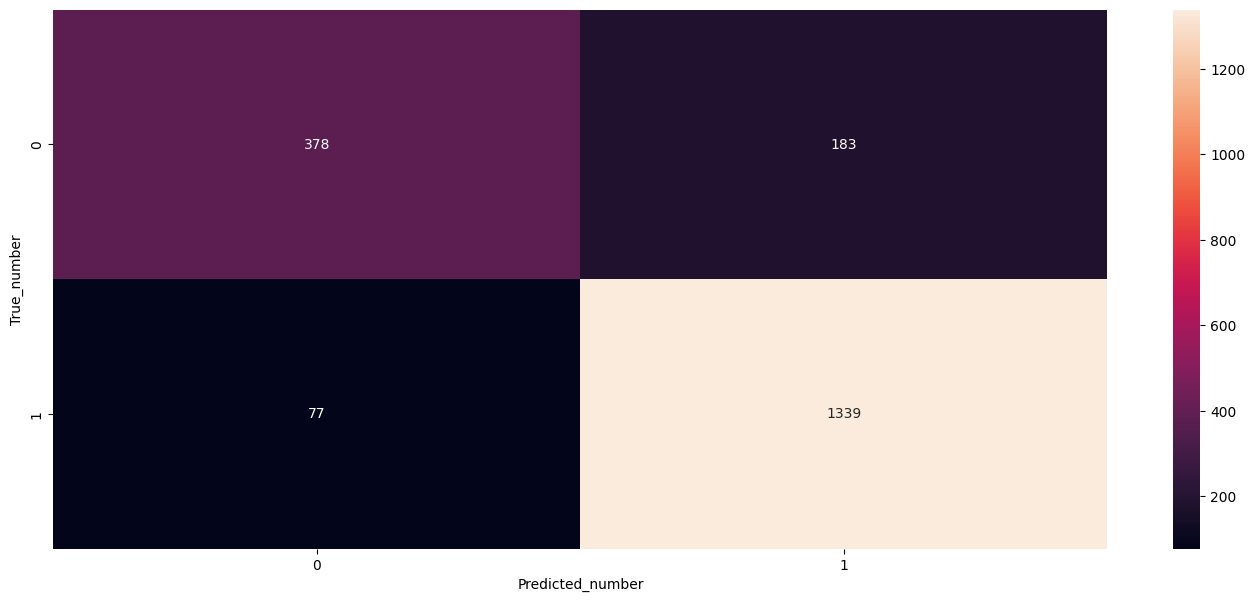

In [45]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
#print classification_report
print(classification_report(y_test,y_pred_lis))
# ploting the confusion metrix plot
conf_mat = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_lis)
plt.figure(figsize = (17,7))
sb.heatmap(conf_mat, annot=True,fmt='d')
plt.xlabel('Predicted_number')
plt.ylabel('True_number')
roc_auc = roc_auc_score(y_test, y_pred_ANN)
print("ROC AUC:")
print(roc_auc)

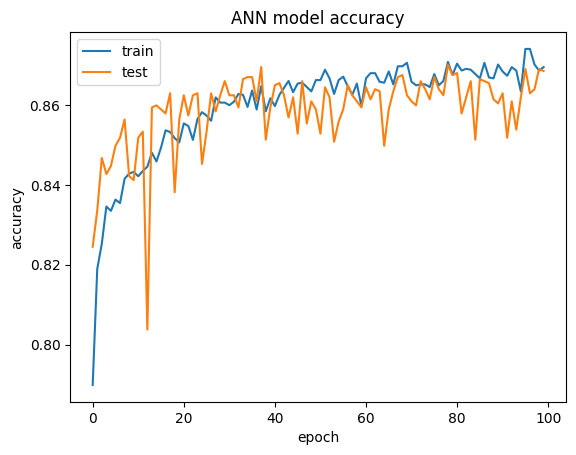

In [46]:
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy']) 
plt.title('ANN model accuracy') 
plt.ylabel('accuracy')
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left') 
plt.show()

# CONVOLUTIONAL NEURAL NETWORK (CNN)

## Preprocessing Data

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D
from keras.optimizers import Adam
import numpy as np
import pandas as pd

In [51]:
df = pd.read_csv('/content/drive/MyDrive/E-Commerce/dataset/mycsvfile.csv')

# One-hot encode categorical variables
df = pd.get_dummies(df)

In [52]:
X = df.drop(columns = "customerstatus")
y = df["customerstatus"].values
X_train, X_test, y_train, y_test_cnn = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify =y)
col=['totalcharges','avgmonthlylongdistancecharges','monthlycharge','totalrevenue','totallongdistancecharges',
     'tenureinmonths','totallongdistancecharges','totalextradatacharges']
scaler = StandardScaler()
X_train[col] = StandardScaler().fit_transform(X_train[col])
X_test[col] = StandardScaler().fit_transform(X_test[col])
print(X_train.shape)
print(X_test.shape)

(4612, 29)
(1977, 29)


## Building model without optimization

In [ ]:
model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape=(29, 1)))
model.add(MaxPooling1D(2))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
145/145 [==============================] - 2s 8ms/step - loss: 0.4759 - accuracy: 0.7684 - val_loss: 0.4034 - val_accuracy: 0.8073
Epoch 2/10
145/145 [==============================] - 1s 6ms/step - loss: 0.3931 - accuracy: 0.8118 - val_loss: 0.3762 - val_accuracy: 0.8214
Epoch 3/10
145/145 [==============================] - 1s 6ms/step - loss: 0.3678 - accuracy: 0.8265 - val_loss: 0.3688 - val_accuracy: 0.8260
Epoch 4/10
145/145 [==============================] - 1s 6ms/step - loss: 0.3584 - accuracy: 0.8369 - val_loss: 0.3571 - val_accuracy: 0.8442
Epoch 5/10
145/145 [==============================] - 1s 6ms/step - loss: 0.3414 - accuracy: 0.8448 - val_loss: 0.3412 - val_accuracy: 0.8412
Epoch 6/10
145/145 [==============================] - 1s 6ms/step - loss: 0.3347 - accuracy: 0.8536 - val_loss: 0.3331 - val_accuracy: 0.8513
Epoch 7/10
145/145 [==============================] - 1s 6ms/step - loss: 0.3291 - accuracy: 0.8526 - val_loss: 0.3325 - val_accuracy: 0.8483
Epoch 

In [65]:
model.evaluate(X_test,y_test)

62/62 [==============================] - 0s 2ms/step - loss: 0.3589 - accuracy: 0.8508


[0.358946830034256, 0.8507840037345886]

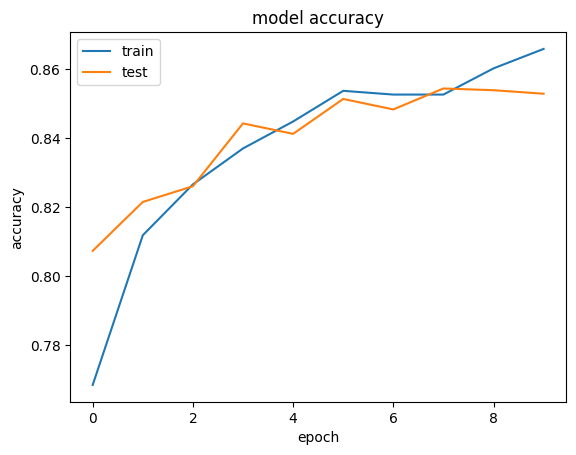

In [ ]:
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy']) 
plt.title('model accuracy') 
plt.ylabel('accuracy')
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left') 
plt.show()

## Tunning Parameters

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

def create_model(num_filters, kernel_size, pool_size, num_dense_layers, dense_layer_size, learning_rate):
    model = Sequential()
    model.add(Conv1D(num_filters, kernel_size, activation='relu', input_shape=(29, 1)))
    model.add(MaxPooling1D(pool_size))
    model.add(Conv1D(num_filters*2, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size))
    model.add(Flatten())
    for i in range(num_dense_layers):
        model.add(Dense(dense_layer_size, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0)

<ipython-input-116-c64ec0114bbe>:18: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


In [ ]:
num_filters = [32, 64]
kernel_size = [3, 5]
pool_size = [2, 3]
num_dense_layers = [1, 2]
dense_layer_size = [32, 64]
learning_rate = [0.001, 0.01, 0.1]
batch_size = [16, 32]

param_grid = dict(num_filters=num_filters, kernel_size=kernel_size, pool_size=pool_size,
                  num_dense_layers=num_dense_layers, dense_layer_size=dense_layer_size,
                  learning_rate=learning_rate, batch_size=batch_size)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best: 0.859714 using {'batch_size': 16, 'dense_layer_size': 32, 'kernel_size': 3, 'learning_rate': 0.01, 'num_dense_layers': 2, 'num_filters': 32, 'pool_size': 2}


## Building final Model

In [6]:
model_cnn = Sequential()
model_cnn.add(Conv1D(32, 3, activation='relu', input_shape=(29, 1)))
model_cnn.add(MaxPooling1D(2))
model_cnn.add(Conv1D(64, 3, activation='relu'))
model_cnn.add(MaxPooling1D(2))
model_cnn.add(Flatten())
model_cnn.add(Dense(32, activation='relu'))
model_cnn.add(Dense(1, activation='sigmoid'))

In [7]:
optimizer = Adam(learning_rate=0.01)
model_cnn.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = model_cnn.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/10
289/289 [==============================] - 2s 4ms/step - loss: 0.4794 - accuracy: 0.7617 - val_loss: 0.4533 - val_accuracy: 0.7678
Epoch 2/10
289/289 [==============================] - 1s 3ms/step - loss: 0.3962 - accuracy: 0.8207 - val_loss: 0.3853 - val_accuracy: 0.8240
Epoch 3/10
289/289 [==============================] - 2s 8ms/step - loss: 0.3749 - accuracy: 0.8294 - val_loss: 0.3619 - val_accuracy: 0.8376
Epoch 4/10
289/289 [==============================] - 2s 8ms/step - loss: 0.3571 - accuracy: 0.8419 - val_loss: 0.3440 - val_accuracy: 0.8452
Epoch 5/10
289/289 [==============================] - 1s 4ms/step - loss: 0.3423 - accuracy: 0.8495 - val_loss: 0.3645 - val_accuracy: 0.8280
Epoch 6/10
289/289 [==============================] - 1s 3ms/step - loss: 0.3297 - accuracy: 0.8549 - val_loss: 0.3322 - val_accuracy: 0.8523
Epoch 7/10
289/289 [==============================] - 1s 3ms/step - loss: 0.3324 - accuracy: 0.8545 - val_loss: 0.3166 - val_accuracy: 0.8609
Epoch 

##Evaluate optimized Model

In [8]:
model_cnn.evaluate(X_test,y_test)

62/62 [==============================] - 0s 2ms/step - loss: 0.3090 - accuracy: 0.8629


[0.30903711915016174, 0.8629236221313477]

In [10]:
y_pred_CNN = model_cnn.predict(X_test)
# unscaling the ypred values 
y_pred_lis = []
for i in y_pred_CNN:
    if i>0.5:
        y_pred_lis.append(1)
    else:
        y_pred_lis.append(0)
print(y_pred_lis)

62/62 [==============================] - 1s 5ms/step
[1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1

In [11]:
data = {'orignal_churn':y_test, 'predicted_churn':y_pred_lis}
df_check = pd.DataFrame(data)
df_check.head(10)

,orignal_churn,predicted_churn
0,1,1
1,1,1
2,1,1
3,0,0
4,1,1
5,1,1
6,0,0
7,0,0
8,1,1
9,0,0


              precision    recall  f1-score   support

           0       0.78      0.72      0.75       561
           1       0.89      0.92      0.91      1416

    accuracy                           0.86      1977
   macro avg       0.84      0.82      0.83      1977
weighted avg       0.86      0.86      0.86      1977

ROC AUC:
0.9249272384865604


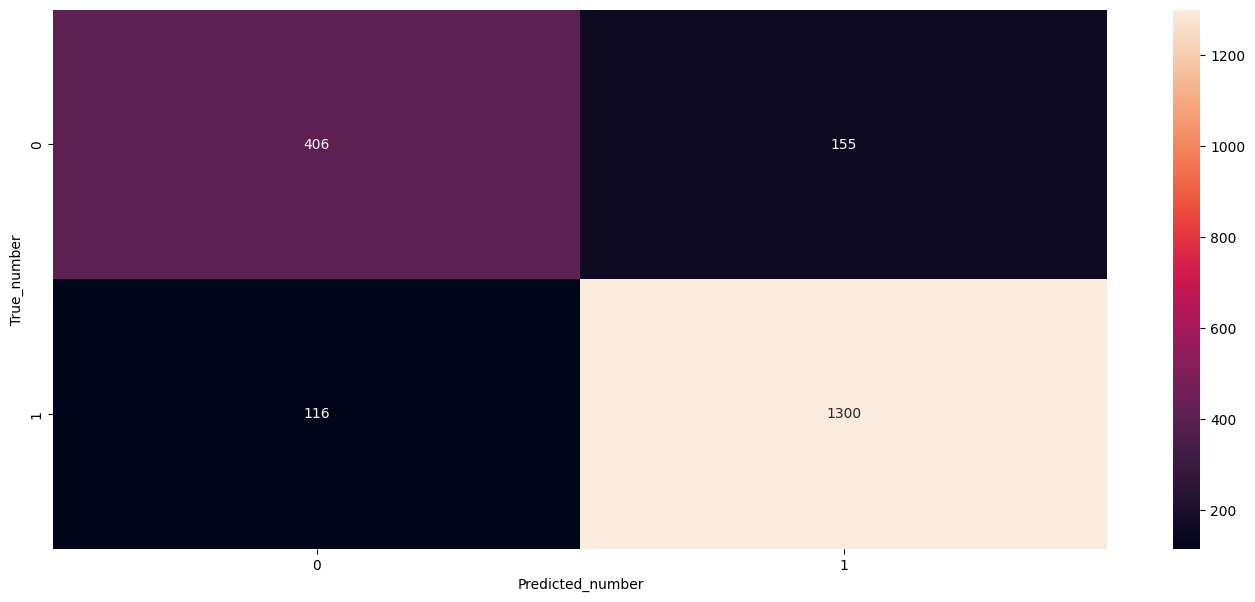

In [12]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
#print classification_report
print(classification_report(y_test,y_pred_lis))
# ploting the confusion metrix plot
conf_mat = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_lis)
plt.figure(figsize = (17,7))
sb.heatmap(conf_mat, annot=True,fmt='d')
plt.xlabel('Predicted_number')
plt.ylabel('True_number')
roc_auc = roc_auc_score(y_test, y_pred_CNN)
print("ROC AUC:")
print(roc_auc)

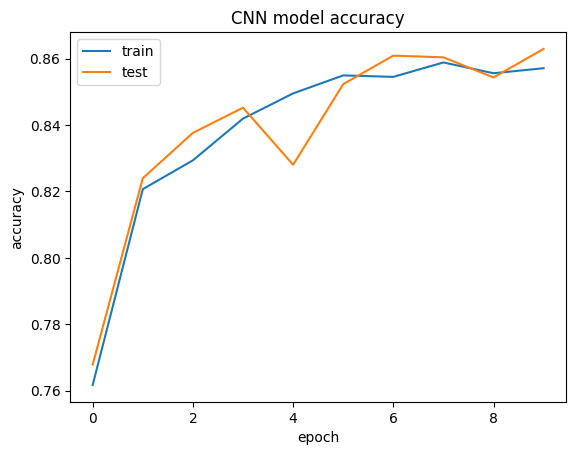

In [13]:
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy']) 
plt.title('CNN model accuracy') 
plt.ylabel('accuracy')
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left') 
plt.show()

# LONG SHORT-TERM MEMORY (LSTM)

## Preprocessing Data

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [54]:
df = pd.read_csv('/content/drive/MyDrive/E-Commerce/dataset/mycsvfile.csv')

In [55]:
X = df.drop(columns = "customerstatus")
y = df["customerstatus"].values
X_train, X_test, y_train, y_test_lstm = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify =y)
col=['totalcharges','avgmonthlylongdistancecharges','monthlycharge','totalrevenue','totallongdistancecharges',
     'tenureinmonths','totallongdistancecharges','totalextradatacharges']
scaler = StandardScaler()
X_train[col] = StandardScaler().fit_transform(X_train[col])
X_test[col] = StandardScaler().fit_transform(X_test[col])

print(X_train.shape)
print(X_test.shape)

(4612, 29)
(1977, 29)


In [17]:
X_train = np.array(X_train).reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = np.array(X_test).reshape((X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape)
print(X_test.shape)

(4612, 1, 29)
(1977, 1, 29)


## Building Model Without Optimization

In [18]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), verbose=2, shuffle=False)

Epoch 1/50
73/73 - 5s - loss: 0.5402 - accuracy: 0.7316 - val_loss: 0.4388 - val_accuracy: 0.7876 - 5s/epoch - 66ms/step
Epoch 2/50
73/73 - 1s - loss: 0.4173 - accuracy: 0.8020 - val_loss: 0.3909 - val_accuracy: 0.8123 - 699ms/epoch - 10ms/step
Epoch 3/50
73/73 - 0s - loss: 0.3818 - accuracy: 0.8259 - val_loss: 0.3706 - val_accuracy: 0.8250 - 494ms/epoch - 7ms/step
Epoch 4/50
73/73 - 0s - loss: 0.3646 - accuracy: 0.8322 - val_loss: 0.3584 - val_accuracy: 0.8351 - 487ms/epoch - 7ms/step
Epoch 5/50
73/73 - 0s - loss: 0.3524 - accuracy: 0.8348 - val_loss: 0.3462 - val_accuracy: 0.8422 - 492ms/epoch - 7ms/step
Epoch 6/50
73/73 - 1s - loss: 0.3459 - accuracy: 0.8393 - val_loss: 0.3491 - val_accuracy: 0.8397 - 505ms/epoch - 7ms/step
Epoch 7/50
73/73 - 0s - loss: 0.3432 - accuracy: 0.8441 - val_loss: 0.3442 - val_accuracy: 0.8407 - 465ms/epoch - 6ms/step
Epoch 8/50
73/73 - 0s - loss: 0.3369 - accuracy: 0.8463 - val_loss: 0.3432 - val_accuracy: 0.8452 - 483ms/epoch - 7ms/step
Epoch 9/50
73/73 

In [22]:
model.evaluate(X_test,y_test)

62/62 [==============================] - 0s 2ms/step - loss: 0.3506 - accuracy: 0.8498


[0.3506271541118622, 0.8497723937034607]

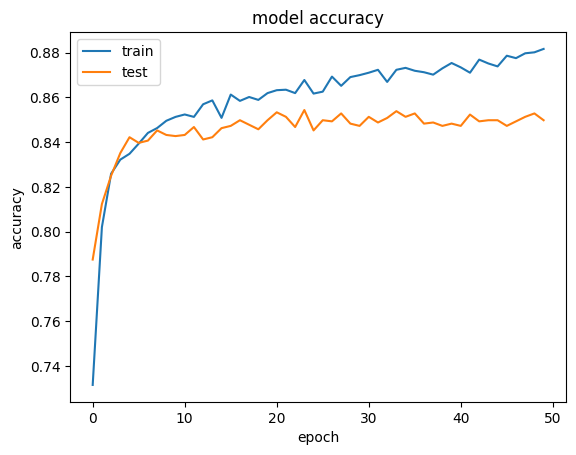

In [23]:
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy']) 
plt.title('model accuracy') 
plt.ylabel('accuracy')
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left') 
plt.show()

## Tunning Parameters

In [26]:
def create_model(n_lstm, dropout_rate, learn_rate):
    model = Sequential()
    model.add(LSTM(n_lstm, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(n_lstm))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = keras.optimizers.Adam(learning_rate=learn_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [27]:
model = KerasClassifier(build_fn=create_model, verbose=0)

param_grid = {
    'n_lstm': [32, 64, 128, 256],
    'batch_size': [32, 64, 128],
    'dropout_rate': [0.0, 0.1, 0.2],
    'learn_rate': [0.001, 0.01, 0.1]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=1)
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

<ipython-input-27-eee95ca2e06f>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best: 0.823285 using {'batch_size': 32, 'dropout_rate': 0.0, 'learn_rate': 0.01, 'n_lstm': 64}


## Building Final Model

In [19]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model_lstm = Sequential()
model_lstm.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model_lstm.add(Dropout(0.0))
model_lstm.add(LSTM(64))
model_lstm.add(Dropout(0.0))
model_lstm.add(Dense(1, activation='sigmoid'))

In [20]:
optimizer = Adam(learning_rate=0.01)
model_lstm.compile(loss='binary_crossentropy', optimizer= optimizer, metrics=['accuracy'])
history = model_lstm.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2, shuffle=False)

Epoch 1/50
145/145 - 5s - loss: 0.4315 - accuracy: 0.7940 - val_loss: 0.3781 - val_accuracy: 0.8336 - 5s/epoch - 35ms/step
Epoch 2/50
145/145 - 1s - loss: 0.3731 - accuracy: 0.8296 - val_loss: 0.3571 - val_accuracy: 0.8457 - 745ms/epoch - 5ms/step
Epoch 3/50
145/145 - 1s - loss: 0.3627 - accuracy: 0.8324 - val_loss: 0.3574 - val_accuracy: 0.8462 - 706ms/epoch - 5ms/step
Epoch 4/50
145/145 - 1s - loss: 0.3553 - accuracy: 0.8382 - val_loss: 0.3562 - val_accuracy: 0.8331 - 744ms/epoch - 5ms/step
Epoch 5/50
145/145 - 1s - loss: 0.3527 - accuracy: 0.8361 - val_loss: 0.3561 - val_accuracy: 0.8392 - 650ms/epoch - 4ms/step
Epoch 6/50
145/145 - 1s - loss: 0.3488 - accuracy: 0.8378 - val_loss: 0.3531 - val_accuracy: 0.8427 - 623ms/epoch - 4ms/step
Epoch 7/50
145/145 - 1s - loss: 0.3382 - accuracy: 0.8450 - val_loss: 0.3496 - val_accuracy: 0.8472 - 647ms/epoch - 4ms/step
Epoch 8/50
145/145 - 1s - loss: 0.3420 - accuracy: 0.8448 - val_loss: 0.3573 - val_accuracy: 0.8442 - 716ms/epoch - 5ms/step
Ep

## Evaluating Optimized Model

In [21]:
model_lstm.evaluate(X_test,y_test)

62/62 [==============================] - 0s 2ms/step - loss: 0.3677 - accuracy: 0.8472


[0.36772239208221436, 0.8472433090209961]

In [22]:
y_pred_LSTM = model_lstm.predict(X_test)
# unscaling the ypred values 
y_pred_lis = []
for i in y_pred_LSTM:
    if i>0.5:
        y_pred_lis.append(1)
    else:
        y_pred_lis.append(0)
print(y_pred_lis)

62/62 [==============================] - 1s 2ms/step
[1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1

In [23]:
data = {'orignal_churn':y_test, 'predicted_churn':y_pred_lis}
df_check = pd.DataFrame(data)
df_check.head(10)

,orignal_churn,predicted_churn
0,1,1
1,1,1
2,1,1
3,0,0
4,1,1
5,1,1
6,0,1
7,0,0
8,1,1
9,0,0


              precision    recall  f1-score   support

           0       0.73      0.73      0.73       561
           1       0.89      0.89      0.89      1416

    accuracy                           0.85      1977
   macro avg       0.81      0.81      0.81      1977
weighted avg       0.85      0.85      0.85      1977

ROC AUC:
0.9042575556159802


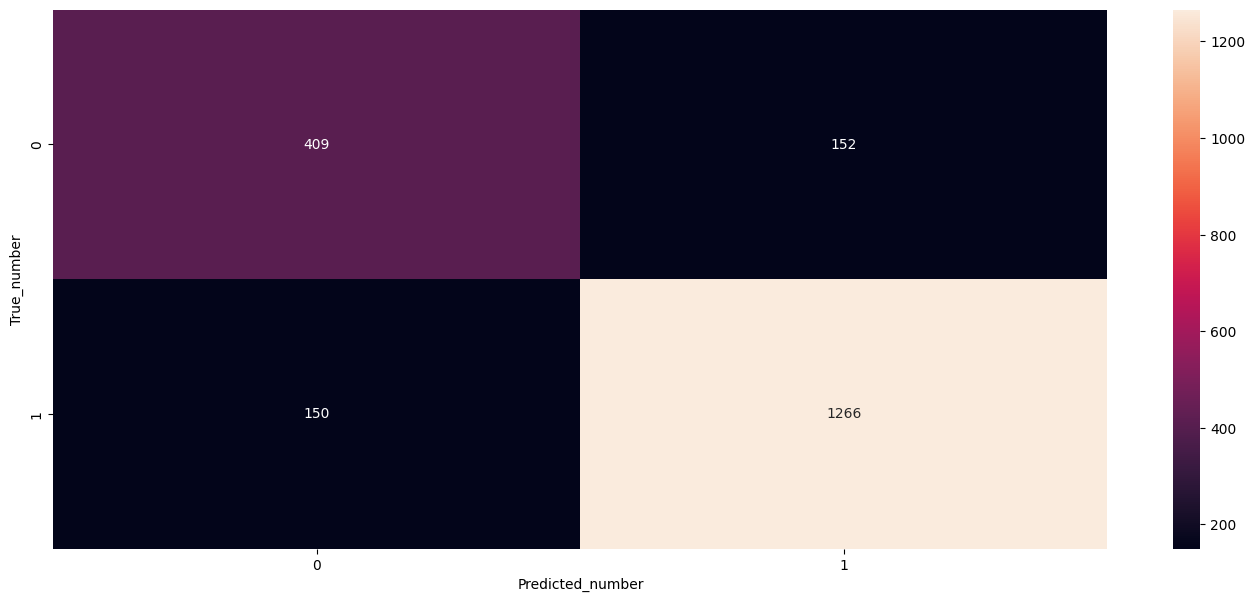

In [24]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
#print classification_report
print(classification_report(y_test,y_pred_lis))
# ploting the confusion metrix plot
conf_mat = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_lis)
plt.figure(figsize = (17,7))
sb.heatmap(conf_mat, annot=True,fmt='d')
plt.xlabel('Predicted_number')
plt.ylabel('True_number')
roc_auc = roc_auc_score(y_test, y_pred_LSTM)
print("ROC AUC:")
print(roc_auc)

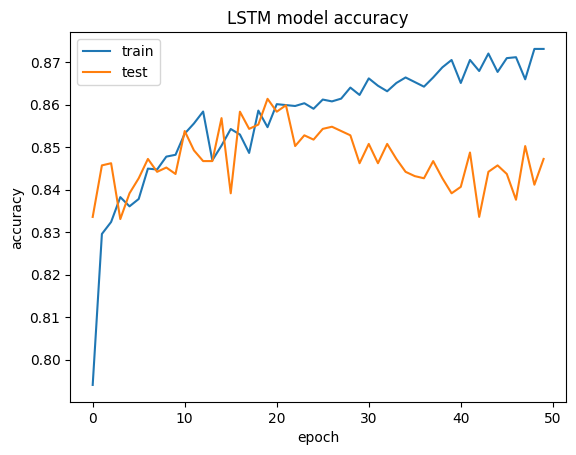

In [25]:
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy']) 
plt.title('LSTM model accuracy') 
plt.ylabel('accuracy')
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left') 
plt.show()

# Result

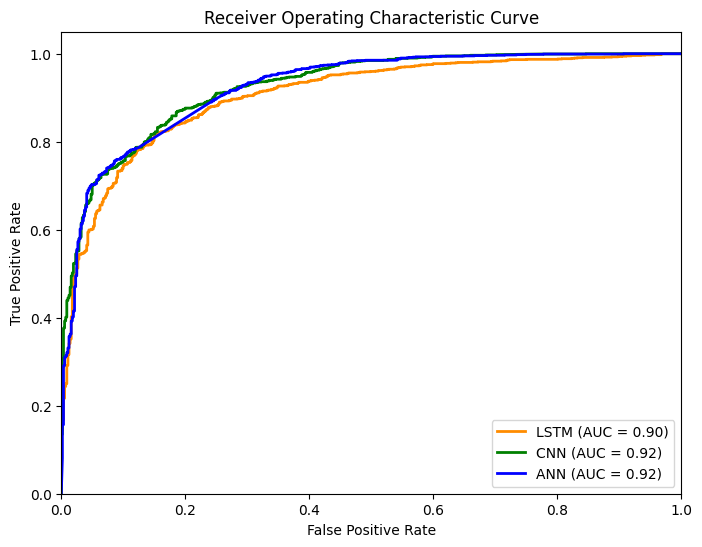

In [58]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr_lstm, tpr_lstm, _ = roc_curve(y_test_lstm, y_pred_LSTM)
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)

fpr_cnn, tpr_cnn, _ = roc_curve(y_test_cnn, y_pred_CNN)
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)

fpr_ann, tpr_ann, _ = roc_curve(y_test_ann, y_pred_ANN)
roc_auc_ann = auc(fpr_ann, tpr_ann)

# Plot ROC curves for all models
plt.figure(figsize=(8, 6))
plt.plot(fpr_lstm, tpr_lstm, color='darkorange', lw=2, label='LSTM (AUC = %0.2f)' % roc_auc_lstm)
plt.plot(fpr_cnn, tpr_cnn, color='green', lw=2, label='CNN (AUC = %0.2f)' % roc_auc_cnn)
plt.plot(fpr_ann, tpr_ann, color='blue', lw=2, label='ANN (AUC = %0.2f)' % roc_auc_ann)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()